## Cross validation to find lambda for reg logistic regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from implementations import *
from plots import *

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# add 1 to each data point 
ones = np.ones(tX.shape[0])
ones = np.expand_dims(ones, axis=1)
tX = np.hstack([ones,tX])
# replace -1 with 0 for logistic regression
y[y==-1] = 0


In [3]:
def cross_validation(y, x, k_indices, k, lambda_):
    """return the loss of ridge regression."""
    mask = np.ones(k_indices.shape[0],dtype=bool)
    mask[k] = 0
    train_indices = k_indices[mask].reshape(-1)
    test_indices = k_indices[k].reshape(-1)


    x_train = x[train_indices]
    y_train = y[train_indices]
    

    x_test = x[test_indices]
    y_test = y[test_indices]

    w_star, loss_tr = reg_logistic_regression(y_train, x_train, lambda_ , np.zeros(31), 1000, 10**(-11))
    loss_te = calculate_penalized_loss(y_train, x_train, w_star, lambda_)
    return loss_tr, loss_te

1
Current iteration=0, loss=129965.09635498974
Current iteration=100, loss=113529.47084025508
Current iteration=200, loss=111983.65014459452
Current iteration=300, loss=111033.70191946678
Current iteration=400, loss=110240.31817903594
Current iteration=500, loss=109528.3328326781
Current iteration=600, loss=108874.11952692224
Current iteration=700, loss=108266.37752455691
Current iteration=800, loss=107698.09124964349
Current iteration=900, loss=107164.20855335834
Current iteration=0, loss=129965.09635498974
Current iteration=100, loss=113313.7204376357
Current iteration=200, loss=111763.51890822052
Current iteration=300, loss=110816.38522494899
Current iteration=400, loss=110026.37545481412
Current iteration=500, loss=109317.58421157437
Current iteration=600, loss=108666.41982279839
Current iteration=700, loss=108061.64475786063
Current iteration=800, loss=107496.27973980524
Current iteration=900, loss=106965.2914229168
Current iteration=0, loss=129965.09635498974
Current iteration=10

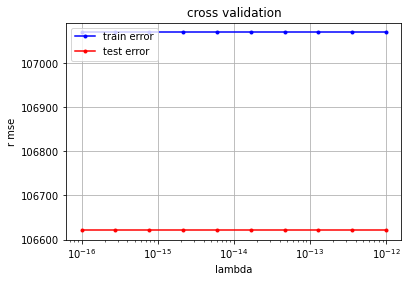

In [16]:
def cross_validation_demo():
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-16, -12, 10)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    counter = 1
    for l in lambdas: # 30
        print(counter)
        counter+=1
        rmse_tr_temp = []
        rmse_te_temp = []
        for i in range(k_fold): # 4
            loss_tr, loss_te = cross_validation(y, tX, k_indices, i, l) # 10
            rmse_tr_temp.append(loss_tr)
            rmse_te_temp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_temp)) 
        rmse_te.append(np.mean(rmse_te_temp))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
cross_validation_demo()